<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Loan Default Prediction</span>  </h1>
   

Dataset link: https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter?select=application_data.csv

$\textbf{Objective/ Problem Statement}$: Client is a financial institution which provides loan (cash or revolving) to the customers. Customers can be a institution/business or an individual. With this Project, client wanted to understand the AI driven customer behaviour who are likely to be default and may skip the EMI payment.

$\textbf{Analysis Goal}:$
1. Do the EDA of the customer behaviours.

2. Build a predictive model that can help business to identify customers who may become default to the loan EMI payment.

3. Use explanability tool to understand the fairness in the model.

$\textbf{Key Deliverables}:$

1. EDA presentation.

2. Building Final Predictive Model.

$\textbf{Methodology}:$

Step 1: Perform the EDA on the given data and understand the association between the dependent and the independent faetures with the target column

Step 2: Prepare the presentation consisting of all the EDAs

Step 3: Build the various predictive Model and compare the performance

Step 4: Choose the best model



In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)             ## Allows all the text in the rows of the dataframe
pd.set_option('display.expand_frame_repr', False)      ## visible on screen
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats       # For Statistical Analysis

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer            # ML Frameworks
from sklearn import preprocessing

%matplotlib inline 

In [2]:
app_data = pd.read_csv('application_data.csv', na_values = 'XNA')

app_data_shape = app_data.shape                         # Stores the shape of the data

print(f'There are {app_data_shape[0]} rows and {app_data_shape[1]} columns in our application data.')

There are 307511 rows and 43 columns in our application data.


In [3]:
app_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,NaN,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,NaN,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,26.0,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,NaN,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,NaN,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
col_des = pd.read_csv('columns_description.csv')    # Obtained from the dataset source
col_des

,S.No,Row,Description
0,1,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
1,2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
2,3,CODE_GENDER,Gender of the client
3,4,FLAG_OWN_CAR,Flag if the client owns a car
4,5,FLAG_OWN_REALTY,Flag if client owns a house or flat
5,6,CNT_CHILDREN,Number of children the client has
6,7,AMT_INCOME_TOTAL,Income of the client
7,8,AMT_CREDIT,Credit amount of the loan
8,9,AMT_ANNUITY,Loan annuity
9,10,NAME_TYPE_SUITE,Who was accompanying client when he was applying for the loan


<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Datatype Information</span>  </h1>

In [5]:
app_data.dtypes        # Gives the datatypes of all the columns

TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS          

In [6]:
app_data.dtypes.value_counts()

int64      19
float64    12
object     12
dtype: int64

Hence, we have a total of $\textbf{19}$ columns, $\textbf{12}$ columns and $\textbf{12}$ columns with datatypes $\textbf{'int64'}$, $\textbf{'object'}$ and $\textbf{'float64'}$ respectively.

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Setting the Data</span>  </h1>

In [7]:
app_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,NaN,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,NaN,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,26.0,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,NaN,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,NaN,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0


In some of the columns like, 'FLAG_EMP_PHONE', 'FLAG_PHONE', etc, the numbers '1' and '0' are not making any sense, so we have to map them to values which mean something to the viewer.

In [8]:
## Mapping the values of the respective columns to a string value

app_data['TARGET_class'] = app_data.TARGET.map({1:'Default', 0:'Not default'})
app_data['FLAG_EMP_PHONE'] = app_data.FLAG_EMP_PHONE.map({1:'YES', 0:'NO'})
app_data['FLAG_WORK_PHONE'] = app_data.FLAG_WORK_PHONE.map({1:'YES', 0:'NO'})
app_data['FLAG_CONT_MOBILE'] = app_data.FLAG_CONT_MOBILE.map({1:'YES', 0:'NO'})
app_data['FLAG_PHONE'] = app_data.FLAG_PHONE.map({1:'YES', 0:'NO'})
app_data['FLAG_EMAIL'] = app_data.FLAG_EMAIL.map({1:'YES', 0:'NO'})

## Ordinal Variables
app_data['REGION_RATING_CLIENT'] = app_data.REGION_RATING_CLIENT.astype(str)   
app_data['REGION_RATING_CLIENT_W_CITY'] = app_data.REGION_RATING_CLIENT_W_CITY.astype(str)

app_data['REG_REGION_NOT_LIVE_REGION'] = app_data.REG_REGION_NOT_LIVE_REGION.map({1:'Different',0:'Same'})
app_data['REG_REGION_NOT_WORK_REGION'] = app_data.REG_REGION_NOT_WORK_REGION.map({1:'Different',0:'Same'})
app_data['LIVE_REGION_NOT_WORK_REGION'] = app_data.LIVE_REGION_NOT_WORK_REGION.map({1:'Different',0:'Same'})
app_data['REG_CITY_NOT_WORK_CITY'] = app_data.REG_CITY_NOT_WORK_CITY.map({1:'Different',0:'Same'})
app_data['LIVE_CITY_NOT_WORK_CITY'] = app_data.LIVE_CITY_NOT_WORK_CITY.map({1:'Different',0:'Same'})

In [9]:
app_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_class
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,NaN,YES,NO,YES,YES,NO,Laborers,1.0,2,2,WEDNESDAY,10,Same,Same,Same,0,Same,Same,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,Default
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,NaN,YES,NO,YES,YES,NO,Core staff,2.0,1,1,MONDAY,11,Same,Same,Same,0,Same,Same,School,0.0,0.0,0.0,0.0,0.0,0.0,Not default
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,26.0,YES,YES,YES,YES,NO,Laborers,1.0,2,2,MONDAY,9,Same,Same,Same,0,Same,Same,Government,0.0,0.0,0.0,0.0,0.0,0.0,Not default
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,NaN,YES,NO,YES,NO,NO,Laborers,2.0,2,2,WEDNESDAY,17,Same,Same,Same,0,Same,Same,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,Not default
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,NaN,YES,NO,YES,NO,NO,Core staff,1.0,2,2,THURSDAY,11,Same,Same,Same,0,Different,Different,Religion,0.0,0.0,0.0,0.0,0.0,0.0,Not default


In [10]:
app_data[['DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED']]

,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_EMPLOYED
0,-9461,-2120,-637
1,-16765,-291,-1188
2,-19046,-2531,-225
3,-19005,-2437,-3039
4,-19932,-3458,-3038
...,...,...,...
307506,-9327,-1982,-236
307507,-20775,-4090,365243
307508,-14966,-5150,-7921
307509,-11961,-931,-4786


By looking at the three columns namely $\textbf{'DAYS_BIRTH', 'DAYS_ID_PUBLISH'}$ and $\textbf{'DAYS_EMPLOYED'}$ in our data, the values are in negative and in days. So, we have convert this data into years, which would make more sense.

In [11]:
app_data['DAYS_BIRTH_YEAR'] = round(abs(app_data['DAYS_BIRTH']/365))
app_data['DAYS_ID_PUBLISH_YEAR'] = round(abs(app_data['DAYS_ID_PUBLISH']/365), 0)
app_data['DAYS_EMPLOYED_YEAR'] = round(abs(app_data['DAYS_EMPLOYED']/365), 0)

In [12]:
app_data['DAYS_BIRTH_YEAR'] = app_data['DAYS_BIRTH_YEAR'].astype('int64')  # Changing the datatype of the column to int
app_data['DAYS_ID_PUBLISH_YEAR'] = app_data['DAYS_ID_PUBLISH_YEAR'].astype('int64')
app_data['DAYS_EMPLOYED_YEAR'] = app_data['DAYS_EMPLOYED_YEAR'].astype('int64')

app_data.dtypes

TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_EMP_PHONE                  object
FLAG_WORK_PHONE                 object
FLAG_CONT_MOBILE                object
FLAG_PHONE                      object
FLAG_EMAIL                      object
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS          

In [13]:
app_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_class,DAYS_BIRTH_YEAR,DAYS_ID_PUBLISH_YEAR,DAYS_EMPLOYED_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,NaN,YES,NO,YES,YES,NO,Laborers,1.0,2,2,WEDNESDAY,10,Same,Same,Same,0,Same,Same,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,Default,26,6,2
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,NaN,YES,NO,YES,YES,NO,Core staff,2.0,1,1,MONDAY,11,Same,Same,Same,0,Same,Same,School,0.0,0.0,0.0,0.0,0.0,0.0,Not default,46,1,3
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,26.0,YES,YES,YES,YES,NO,Laborers,1.0,2,2,MONDAY,9,Same,Same,Same,0,Same,Same,Government,0.0,0.0,0.0,0.0,0.0,0.0,Not default,52,7,1
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,NaN,YES,NO,YES,NO,NO,Laborers,2.0,2,2,WEDNESDAY,17,Same,Same,Same,0,Same,Same,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,Not default,52,7,8
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,NaN,YES,NO,YES,NO,NO,Core staff,1.0,2,2,THURSDAY,11,Same,Same,Same,0,Different,Different,Religion,0.0,0.0,0.0,0.0,0.0,0.0,Not default,55,9,8


In [14]:
## AS we do not need the columns '𝐃𝐀𝐘𝐒_𝐁𝐈𝐑𝐓𝐇', '𝐃𝐀𝐘𝐒_𝐈𝐃_𝐏𝐔𝐁𝐋𝐈𝐒𝐇' and '𝐃𝐀𝐘𝐒_𝐄𝐌𝐏𝐋𝐎𝐘𝐄𝐃', we are dropping them

del(app_data['DAYS_BIRTH'], app_data['DAYS_ID_PUBLISH'], app_data['DAYS_EMPLOYED'])

In [15]:
app_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_class,DAYS_BIRTH_YEAR,DAYS_ID_PUBLISH_YEAR,DAYS_EMPLOYED_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,YES,NO,YES,YES,NO,Laborers,1.0,2,2,WEDNESDAY,10,Same,Same,Same,0,Same,Same,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,Default,26,6,2
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,YES,NO,YES,YES,NO,Core staff,2.0,1,1,MONDAY,11,Same,Same,Same,0,Same,Same,School,0.0,0.0,0.0,0.0,0.0,0.0,Not default,46,1,3
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,YES,YES,YES,YES,NO,Laborers,1.0,2,2,MONDAY,9,Same,Same,Same,0,Same,Same,Government,0.0,0.0,0.0,0.0,0.0,0.0,Not default,52,7,1
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,NaN,YES,NO,YES,NO,NO,Laborers,2.0,2,2,WEDNESDAY,17,Same,Same,Same,0,Same,Same,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,Not default,52,7,8
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,NaN,YES,NO,YES,NO,NO,Core staff,1.0,2,2,THURSDAY,11,Same,Same,Same,0,Different,Different,Religion,0.0,0.0,0.0,0.0,0.0,0.0,Not default,55,9,8


<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Categorical Vs Numerical Columns</span>  </h1>

In [16]:
## Selecting Categorical and Numerical Columns 

cat_cols = app_data.select_dtypes(include=np.object).columns.tolist()
num_cols = app_data.select_dtypes(exclude=np.object).columns.tolist()

print('******************************Categorical Columns****************************')
print(cat_cols)
print(' ')
print('******************************Numerical Columns****************************')
print(num_cols)


******************************Categorical Columns****************************
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'TARGET_class']
 
******************************Numerical Columns****************************
['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDI

We are having $\textbf{19}$ Numerical Columns and $\textbf{25}$ Categorical Columns.

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Class Imbalance</span>  </h1>

In [17]:
## Checking Class Imbalances

app_data.TARGET_class.value_counts(normalize=True)   # Helps in checking biasness

Not default    0.919271
Default        0.080729
Name: TARGET_class, dtype: float64

$\textbf{Reason}:$ For making the model, we cannot use this data as of now, because of the class imbalance. If we train our model using this data, it will only make the result come to "Not Default", as there are more "Not default"s in our data comparing to defaults.

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Univariate Analysis</span>  </h1>

### <center>For Numerical Columns

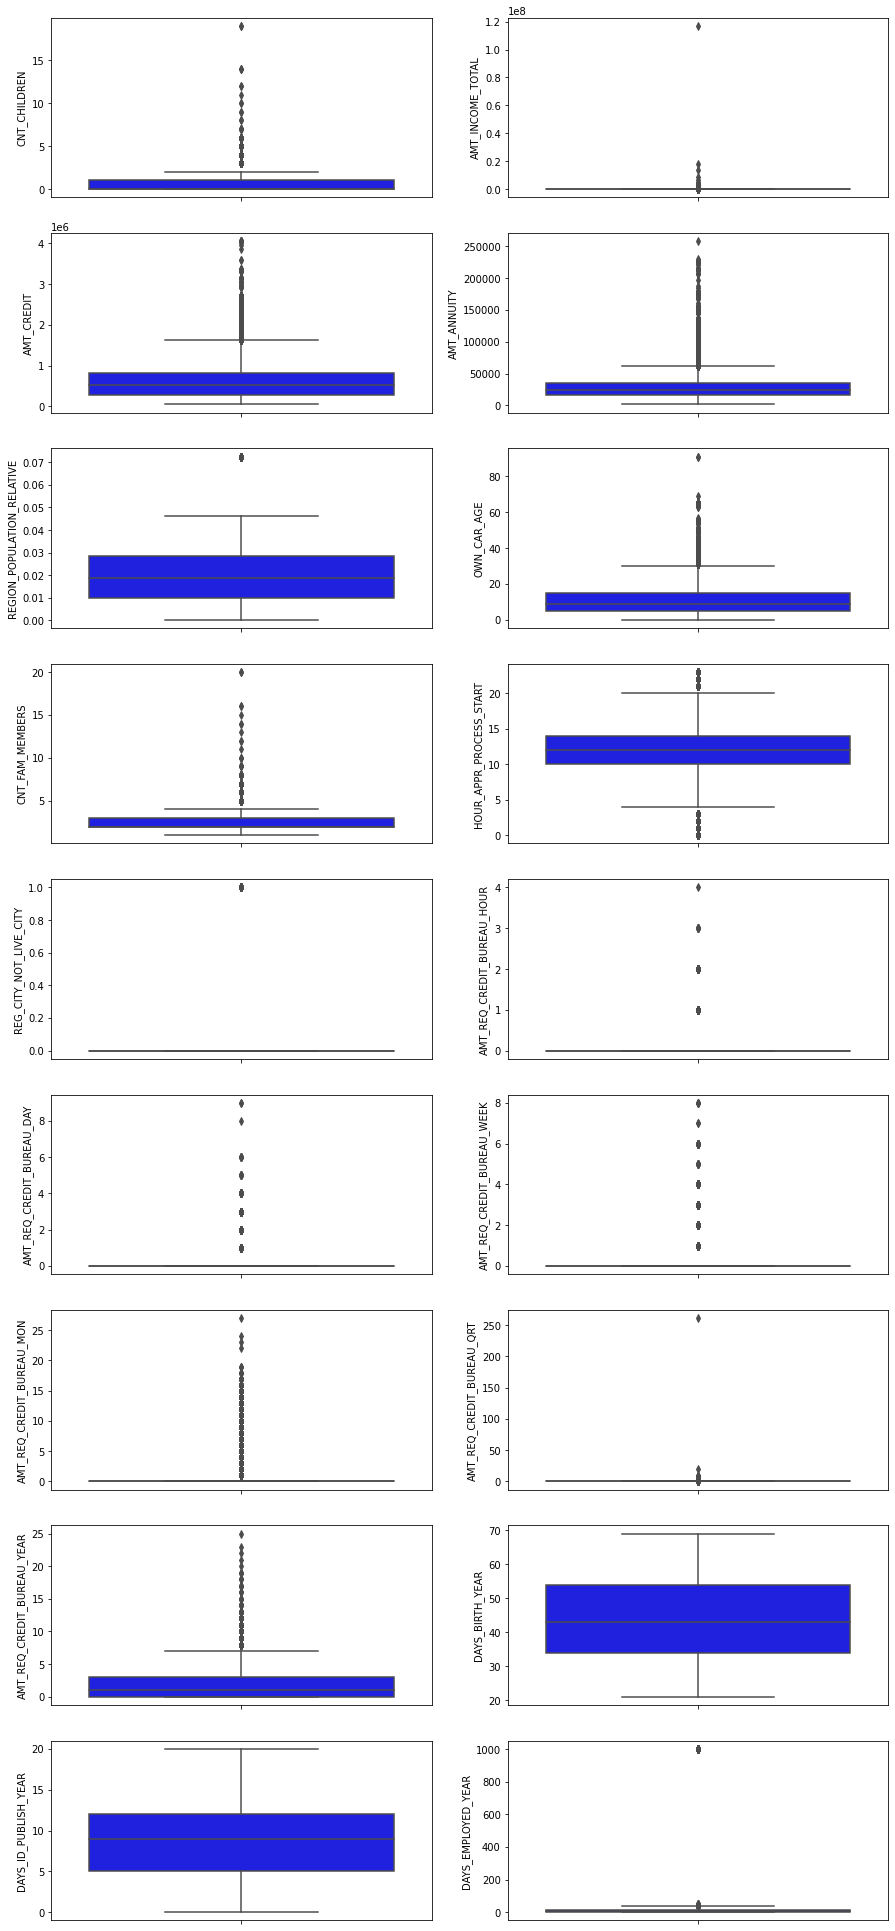

In [18]:
fig,axs=plt.subplots(9,2, figsize=(15,35)) #9 rows and 2 columns (18 plots) as there are 18 features in num_cols excluding 'TARGET'.

r=0
c=0

for i,j in enumerate(num_cols[1:]):
    sns.boxplot(y=app_data[j], ax=axs[r,c], color='b', orient='v')
    if i%2==1:
        r+=1
        c=0
    else:
        c+=1
plt.show()

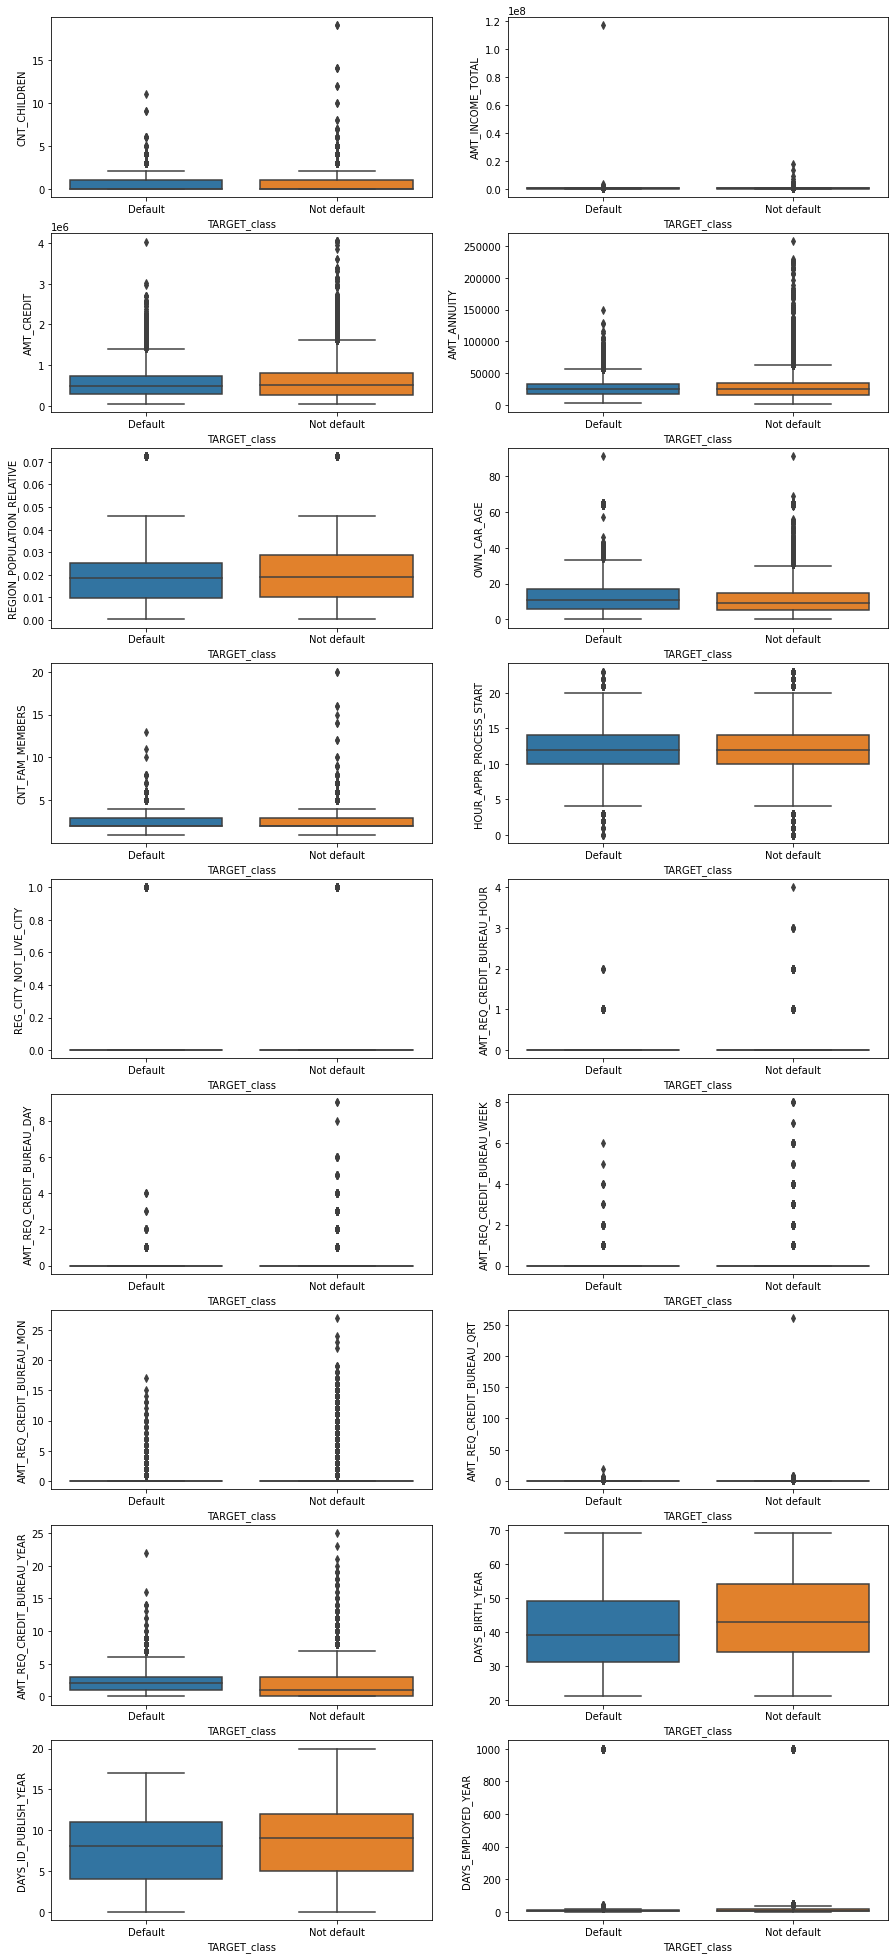

In [19]:
fig,axs=plt.subplots(9,2, figsize=(15,35)) #9 rows and 2 columns (18 plots) as there are 18 features in num_cols excluding 'TARGET'.
             
r=0
c=0

for i,j in enumerate(num_cols[1:]):             ## On the x-axis, we bring the TARGET_class, i.e., Default Vs Not_default
    sns.boxplot(x= app_data['TARGET_class'], y=app_data[j], ax=axs[r,c], orient='v')
    if i%2==1:
        r+=1
        c=0
    else:
        c+=1
plt.show()

In [20]:
def UVA_numeric(data, var_group):
    ''' 
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size, 3), dpi = 100)
  
     #looping for each variable
    for j,i in enumerate(var_group):
    
      # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

    # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.kdeplot(x = data[i], shade=True)
        sns.lineplot(x = points, y = [0, 0], color = 'green', label = "std_dev")
        sns.scatterplot(x = [mini,maxi], y = [0, 0], color = 'orange', label = "min/max")
        sns.scatterplot(x = [mean], y = [0], color = 'red', label = "mean")
        sns.scatterplot(x = [median], y = [0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                    round(kurt,2),
                                                                                                    round(skew,2),
                                                                                                    (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                    round(mean,2),
                                                                                                    round(median,2)))

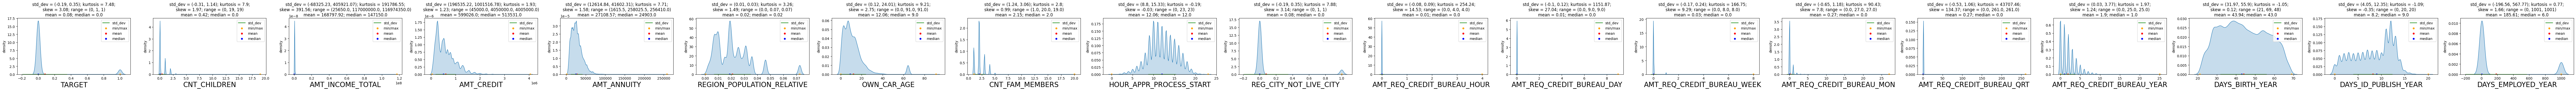

In [21]:
UVA_numeric(app_data, num_cols)

The above analysis has helped us knowing the $\textbf{overall distribution}$ and $\textbf{Outliers}$ in the respective columns. This also tells us which columns $\textbf{follow normal distribution}$ and the distribution of the data in $\textbf{Default Vs Non-Default customers}$.

### <center> For Categorical Columns

In [22]:
def UVA_category(data, var_group):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi = 100)

    # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()

    #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count, norm_count.index , order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

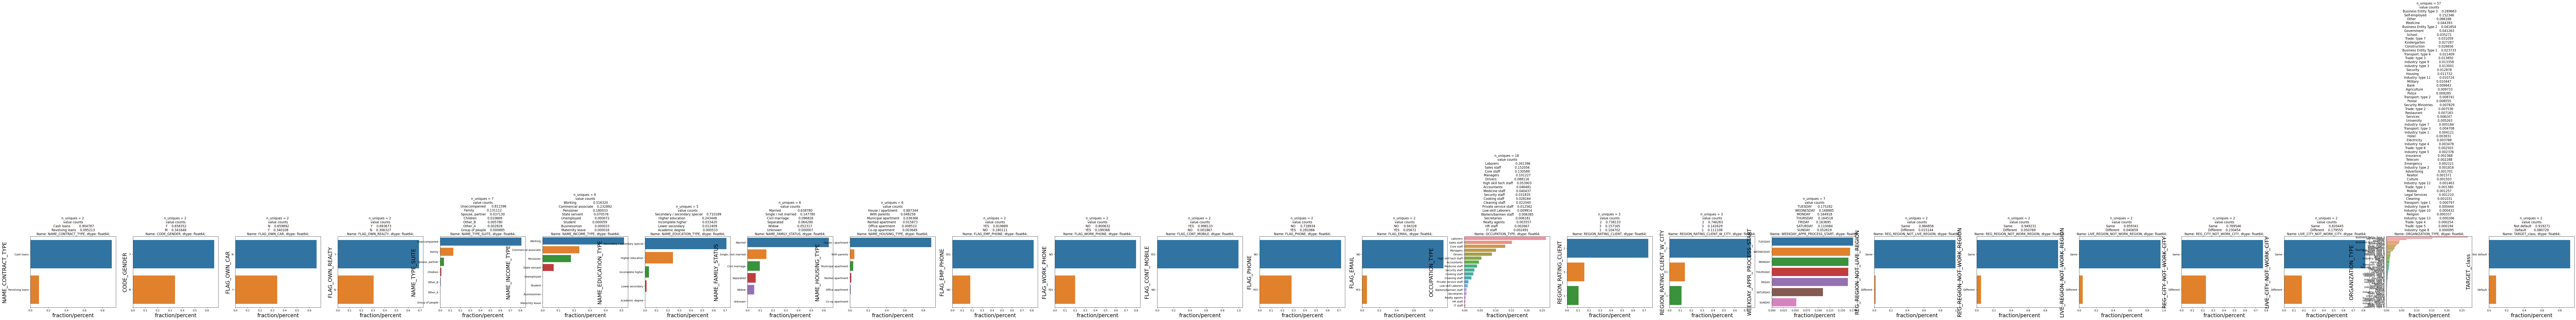

In [23]:
UVA_category(app_data, cat_cols)


<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Bivariate Analysis</span>  </h1>

## <center> Numerical-Numerical

### Correlation matrix

In [24]:
# calculating correlation
numerical = app_data[num_cols]

correlation = numerical.dropna().corr()
correlation

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEAR,DAYS_ID_PUBLISH_YEAR,DAYS_EMPLOYED_YEAR
TARGET,1.000000,0.005680,-0.022375,-0.035478,-0.015779,-0.036110,0.037232,-0.001251,-0.020451,0.032423,0.001845,-0.000980,0.000818,-0.010564,-0.003556,0.029854,-0.054999,-0.032414,-0.030785
CNT_CHILDREN,0.005680,1.000000,0.006491,-0.021083,-0.001363,-0.032118,0.008950,0.914414,-0.014814,0.014120,-0.002877,-0.001091,-0.000802,-0.012363,-0.008501,-0.026185,-0.279480,0.084115,-0.184599
AMT_INCOME_TOTAL,-0.022375,0.006491,1.000000,0.324855,0.411376,0.167362,-0.132172,-0.001726,0.068309,0.006718,0.001604,0.011814,0.009437,0.053416,0.010347,0.008800,-0.015624,-0.016655,-0.102552
AMT_CREDIT,-0.035478,-0.021083,0.324855,1.000000,0.746343,0.092044,-0.092800,0.020203,0.043169,-0.034069,-0.004664,0.005541,0.000101,0.049392,0.022491,-0.054903,0.116931,0.017308,-0.016093
AMT_ANNUITY,-0.015779,-0.001363,0.411376,0.746343,1.000000,0.112656,-0.096198,0.030465,0.037581,-0.014827,0.003438,0.004761,0.018596,0.030116,0.019609,-0.011340,0.053307,0.005413,-0.050355
REGION_POPULATION_RELATIVE,-0.036110,-0.032118,0.167362,0.092044,0.112656,1.000000,-0.081436,-0.034210,0.182697,-0.045413,-0.007478,0.003207,0.000804,0.076158,-0.003639,-0.008441,0.038727,-0.007415,0.002103
OWN_CAR_AGE,0.037232,0.008950,-0.132172,-0.092800,-0.096198,-0.081436,1.000000,-0.014499,-0.071475,0.007572,-0.000204,-0.008652,0.001692,-0.021855,-0.017641,-0.014361,-0.001181,-0.005983,0.030992
CNT_FAM_MEMBERS,-0.001251,0.914414,-0.001726,0.020203,0.030465,-0.034210,-0.014499,1.000000,-0.025229,0.004269,-0.001331,-0.003303,0.001062,-0.010854,-0.005366,-0.014513,-0.197780,0.091677,-0.153064
HOUR_APPR_PROCESS_START,-0.020451,-0.014814,0.068309,0.043169,0.037581,0.182697,-0.071475,-0.025229,1.000000,0.012556,-0.015007,0.004610,-0.002476,0.037800,-0.000477,-0.029160,-0.077754,-0.017877,-0.065243
REG_CITY_NOT_LIVE_CITY,0.032423,0.014120,0.006718,-0.034069,-0.014827,-0.045413,0.007572,0.004269,0.012556,1.000000,0.003681,-0.000313,0.000928,-0.011058,0.004871,0.006911,-0.147740,-0.049786,-0.061326


### Heat Map

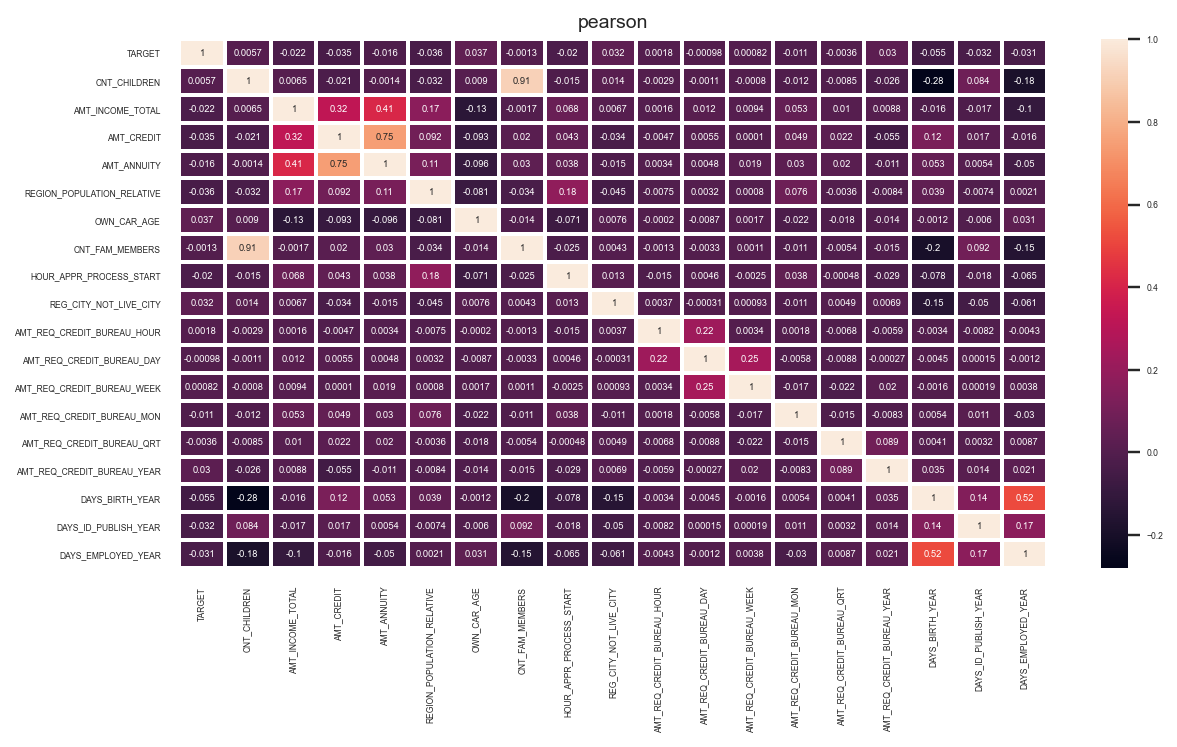

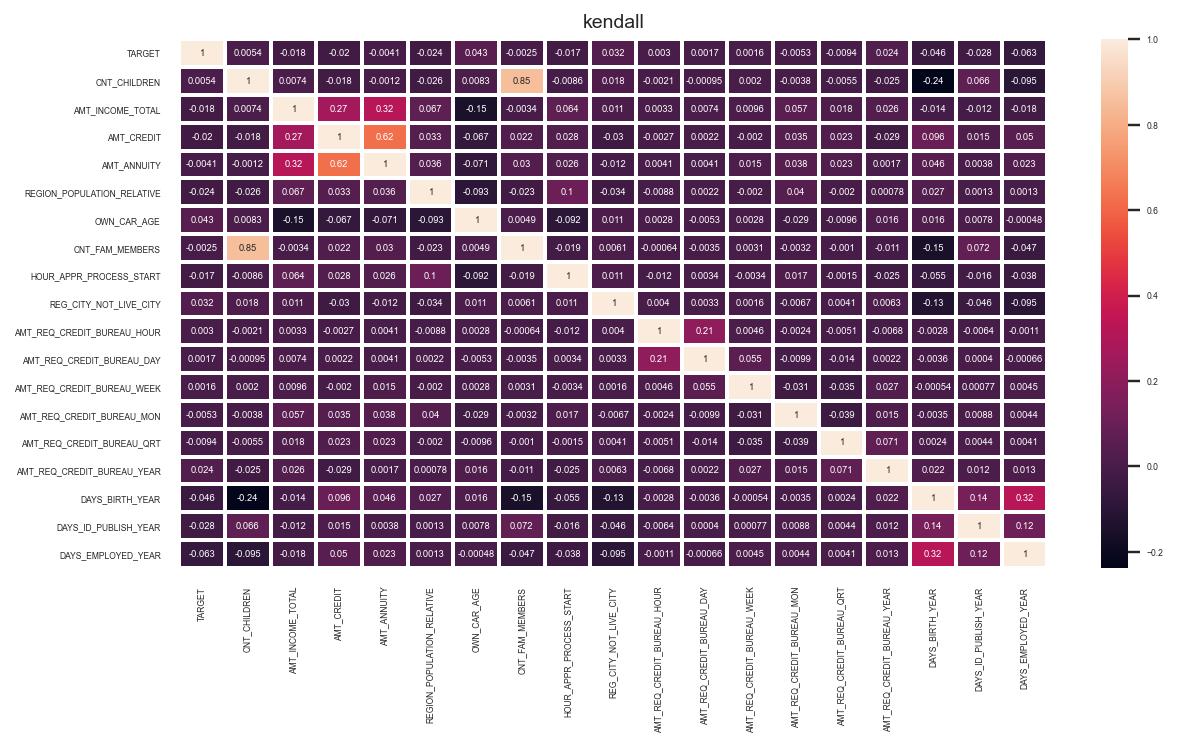

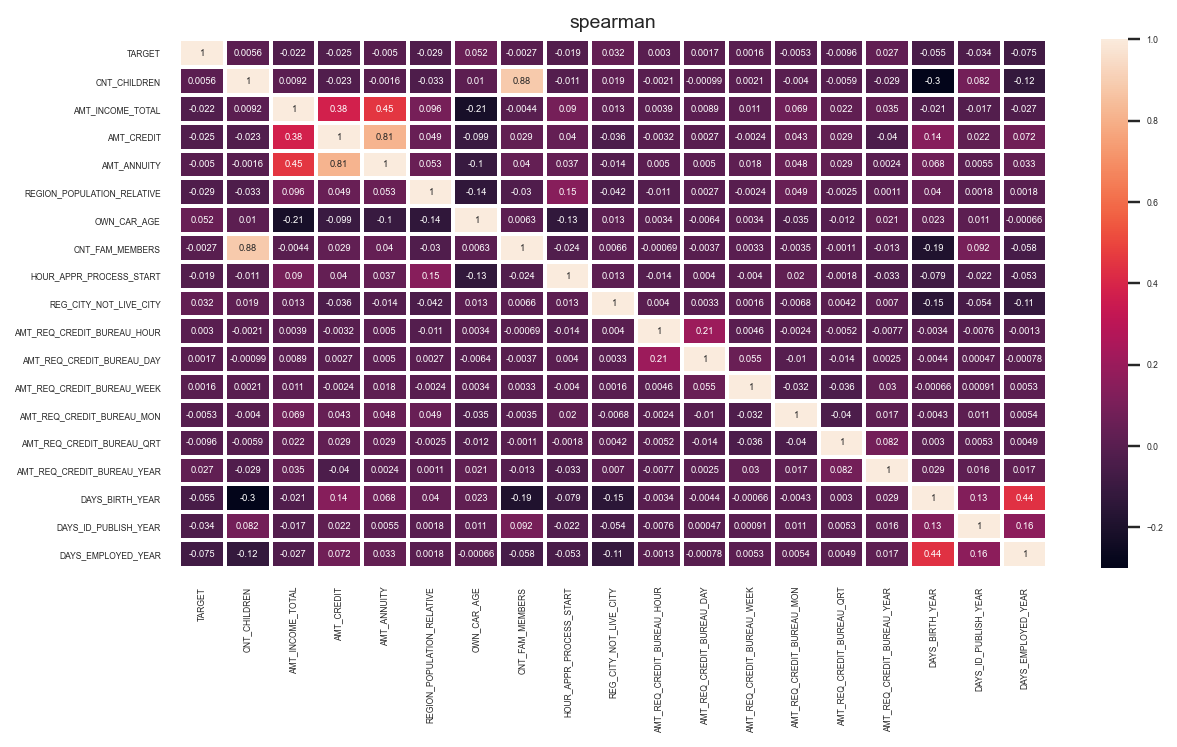

In [25]:
# plotting heatmap usill all methods for all numerical variables
sns.set(font_scale=0.4)

for j,i in enumerate(['pearson','kendall','spearman']):
    plt.figure(figsize=(10, 5), dpi=140)
    correlation = numerical.dropna().corr(method = i)
    sns.heatmap(correlation, linewidth = 2, annot = True)
    plt.title(i, fontsize = 10)
    
   

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Missing Value Treatment</span>  </h1>

In [26]:
miss_info = app_data.isna().sum()/len(app_data) * 100

miss_info[miss_info > 0].sort_values(ascending = False)

OWN_CAR_AGE                   65.990810
OCCUPATION_TYPE               31.345545
ORGANIZATION_TYPE             18.007161
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
NAME_TYPE_SUITE                0.420148
AMT_ANNUITY                    0.003902
CODE_GENDER                    0.001301
CNT_FAM_MEMBERS                0.000650
dtype: float64

In [27]:
missing_cols = miss_info[miss_info > 0].index.tolist()      ## Columns with the missing values
missing_cols

['CODE_GENDER',
 'AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'ORGANIZATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In the above result, we can see that the columns with maximum missing values are $\textbf{'OWN_CAR_AGE' and 'OCCUPATION_TYPE'}$

In [28]:
app_data[['FLAG_OWN_CAR','OWN_CAR_AGE', 'OCCUPATION_TYPE']]

# app_data[['FLAG_OWN_CAR','OWN_CAR_AGE', 'OCCUPATION_TYPE']].head(50)

# Run the above command to see the top 50 rows

,FLAG_OWN_CAR,OWN_CAR_AGE,OCCUPATION_TYPE
0,N,NaN,Laborers
1,N,NaN,Core staff
2,Y,26.0,Laborers
3,N,NaN,Laborers
4,N,NaN,Core staff
...,...,...,...
307506,N,NaN,Sales staff
307507,N,NaN,NaN
307508,N,NaN,Managers
307509,N,NaN,Laborers


In the above output, it can be clearly seen that for the individuals who are having cars, the age is available but if someone is not having the car, corresponding value in 'OWN_CAR_AGE' is not available. That is the reason for maximum number of missing values in 'OWN_CAR_AGE' column, i.e., 66%. 

So, we are just $\textbf{replacing the NaN values with 0}$, as we do not want any loss of inherent pattern within the data.

In [29]:
app_data['OWN_CAR_AGE'] = np.where(app_data['FLAG_OWN_CAR'] == 'N', 0, app_data['OWN_CAR_AGE'])

app_data['OWN_CAR_AGE'] = app_data['OWN_CAR_AGE'].replace(np.nan, 0)

app_data['FLAG_OWN_CAR']   # Looking for changes

app_data['OWN_CAR_AGE'].unique()

array([ 0., 26., 17.,  8., 23.,  7., 14.,  1.,  3., 13., 10.,  2., 21.,
       20., 22., 65.,  5., 11.,  9.,  4., 15., 12., 25.,  6., 64., 27.,
       19., 28., 18., 16., 30., 36., 24., 39., 29., 40., 41., 31., 42.,
       37., 35., 34., 33., 54., 38., 32., 43., 55., 49., 44., 63., 46.,
       45., 48., 56., 51., 57., 69., 50., 47., 91., 52.])

### <center> Missing Values Imputation (NUMERICAL)

In [30]:
def imput_function(col_value, method):
    imput_algo = SimpleImputer(missing_values = np.nan, strategy = method)  # Method = Mean, Median, Mod, constant
    out_col = imput_algo.fit_transform(col_value.values.reshape(-1, 1))  # Makes the data 2d, as simple imputer takes 2D data
    return (out_col.reshape(-1,))                                 # '-1' uses all the rows irrespective of the no. of cols
                                                                  # As we just need the output in 1d, so we reshape the col
                                                                  # '1' just adds one more dimension to it

In [31]:
imput_num_cols = list(set(num_cols) & set(missing_cols))  ## All the columns which are num_cols as well as part
                                                      ## of missing_cols
imput_num_cols

['AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_ANNUITY',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_HOUR']

### Imputing with Median

During Univariate analysis, we have already seen that column $\textbf{'AMT_ANNUITY'}$ has a lot of Outliers. So, we would be using Median, for imputing the missing values in this column.

In [32]:
app_data['AMT_ANNUITY'].isna().sum() # this column gives the amount paid by the customer annually

12

In [33]:
app_data['AMT_ANNUITY'].describe() 

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

The statistics of the column further confirm that the column has a lot of Outliers. This has inturn has affected the mean very much, so we use median as the criteria for imputing the missing values.

In [34]:
app_data['AMT_ANNUITY'] = imput_function(app_data['AMT_ANNUITY'], method = 'median')

app_data['AMT_ANNUITY'].isna().sum()   # Hence, our missing values are now replaced by the median 

0

In [35]:
app_data['AMT_ANNUITY'].describe() 

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

Futher, we have not changed the statistics of the column drastically, which could have lead to unnecessary affect on the inherent pattern.

### Imputing with Mean

In [36]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
27.0         1
22.0         1
23.0         1
24.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

From the output it is evident that $\textbf{the values are discrete in nature}$ and mean is a better imputing measure for a continuous value. Similar is true for columns like 'CNT_FAMILY_MEMBERS'. So, we are going to use $\textbf{Mode}$ for imputing missing values in these columns.

### Imputing with Mode 

In [37]:
imput_mod_col = ['AMT_REQ_CREDIT_BUREAU_DAY',       ## We are going to imput them with MODE
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'CNT_FAM_MEMBERS',
 'AMT_REQ_CREDIT_BUREAU_WEEK']

In [38]:
app_data[imput_mod_col].isna().sum() # Checking the number of missing values in the respective columns

AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
CNT_FAM_MEMBERS                   2
AMT_REQ_CREDIT_BUREAU_WEEK    41519
dtype: int64

In [39]:
app_data[imput_mod_col].describe().T    # Checking the stats before imputing with mode   (BEFORE)

,count,mean,std,min,25%,50%,75%,max
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_YEAR,265992.0,1.899974,1.869295,0.0,0.0,1.0,3.0,25.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0
AMT_REQ_CREDIT_BUREAU_HOUR,265992.0,0.006402,0.083849,0.0,0.0,0.0,0.0,4.0
CNT_FAM_MEMBERS,307509.0,2.152665,0.910682,1.0,2.0,2.0,3.0,20.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0


In [40]:
## For applying mod, we use 'most_frequent'

app_data[imput_mod_col] = app_data[imput_mod_col].apply(lambda col: imput_function(col_value = col, method = 'most_frequent'))

In [41]:
app_data[imput_mod_col].isna().sum() # Reconfirming, we have 0 missing values in each column

AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
CNT_FAM_MEMBERS               0
AMT_REQ_CREDIT_BUREAU_WEEK    0
dtype: int64

In [42]:
app_data[imput_mod_col].describe().T    # Rechecking the stats   (AFTER)

,count,mean,std,min,25%,50%,75%,max
AMT_REQ_CREDIT_BUREAU_DAY,307511.0,0.006055,0.103037,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_MON,307511.0,0.231293,0.856810,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_YEAR,307511.0,1.643447,1.855821,0.0,0.0,1.0,3.0,25.0
AMT_REQ_CREDIT_BUREAU_QRT,307511.0,0.229631,0.744059,0.0,0.0,0.0,0.0,261.0
AMT_REQ_CREDIT_BUREAU_HOUR,307511.0,0.005538,0.078014,0.0,0.0,0.0,0.0,4.0
CNT_FAM_MEMBERS,307511.0,2.152664,0.910679,1.0,2.0,2.0,3.0,20.0
AMT_REQ_CREDIT_BUREAU_WEEK,307511.0,0.029723,0.190728,0.0,0.0,0.0,0.0,8.0


After comparing both $\textbf{the BEFORE and AFTER statistics}$, we can see that we have not interfered with the basic statistics of the columns where the values have been imputed using MODE.

In [43]:
app_data[num_cols].isna().sum()   # So, our numerical columns do not have any missing values

TARGET                        0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
REGION_POPULATION_RELATIVE    0
OWN_CAR_AGE                   0
CNT_FAM_MEMBERS               0
HOUR_APPR_PROCESS_START       0
REG_CITY_NOT_LIVE_CITY        0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
DAYS_BIRTH_YEAR               0
DAYS_ID_PUBLISH_YEAR          0
DAYS_EMPLOYED_YEAR            0
dtype: int64

Hence, we can conclude that our $\textbf{numerical columns do not have any missing values now.}$

## <center> Missing Values Imputation (CATEGORICAL)

Here, we have two methods:
    
1. Replacing with Most frequent Value
2. Replace with a random value from the same column with same proportion



In [44]:
imput_cat_cols = list(set(cat_cols) & set(missing_cols))
imput_cat_cols

['OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'CODE_GENDER', 'ORGANIZATION_TYPE']

### Replacing with MODE

In [45]:
app_data['CODE_GENDER'].isna().sum()  # There are 4 NA values in our data

4

In [46]:
## Using the imput function, we made earlier

app_data['CODE_GENDER'] = imput_function(app_data['CODE_GENDER'], method = 'most_frequent')

In [47]:
app_data['CODE_GENDER'].isna().sum() 

0

Hence, all the 4 NA values in the 'CODE_GENDER' column gets replaced with the MODE value.

### Replacing with a Random value from the "Same-Column in the Same-Proportion "

In [48]:
def imput_cat_random_val(col_value):
    N = len(col_value)                       ## calculates the number of values in the columns
    val_prop = col_value.value_counts(normalize = True)
    lbl = val_prop.index.tolist()        # Splitting the label information from the dataframe
    prob = val_prop.values                # Splitting for the values from the DataFrame
    imput_val = np.random.choice(lbl, p = prob, size = N)    # Selects a random value from a list of size N and probability 'p'
    out = col_value.fillna(pd.Series(imput_val))
    
    return (out)

In [49]:
cat_random_imput = ['NAME_TYPE_SUITE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE']

## All the Categorical columns with missing values excep 'CODE_GENDER'

for i in cat_random_imput:
    app_data[i] = imput_cat_random_val(col_value = app_data[i])

In [50]:
app_data.isna().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
OWN_CAR_AGE                    0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_N

$\textbf{Conclusion}$: Now, we do not have any missing values in our data.

In [51]:
app_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_class,DAYS_BIRTH_YEAR,DAYS_ID_PUBLISH_YEAR,DAYS_EMPLOYED_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0.0,YES,NO,YES,YES,NO,Laborers,1.0,2,2,WEDNESDAY,10,Same,Same,Same,0,Same,Same,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,Default,26,6,2
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,0.0,YES,NO,YES,YES,NO,Core staff,2.0,1,1,MONDAY,11,Same,Same,Same,0,Same,Same,School,0.0,0.0,0.0,0.0,0.0,0.0,Not default,46,1,3
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,YES,YES,YES,YES,NO,Laborers,1.0,2,2,MONDAY,9,Same,Same,Same,0,Same,Same,Government,0.0,0.0,0.0,0.0,0.0,0.0,Not default,52,7,1
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,0.0,YES,NO,YES,NO,NO,Laborers,2.0,2,2,WEDNESDAY,17,Same,Same,Same,0,Same,Same,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,Not default,52,7,8
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,0.0,YES,NO,YES,NO,NO,Core staff,1.0,2,2,THURSDAY,11,Same,Same,Same,0,Different,Different,Religion,0.0,0.0,0.0,0.0,0.0,0.0,Not default,55,9,8


<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Outlier Treatment</span>  </h1> 

In [52]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
    '''
    Univariate_Analysis_outlier:
    takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

    data : dataframe from which to plot from\n
    var_group : {list} type Group of Continuous variables\n
    include_outlier : {bool} whether to include outliers or not, default = True\n
    '''

    size = len(var_group)
    plt.figure(figsize = (3*size,2), dpi = 340)
  
    #looping for each variable
    for j,i in enumerate(var_group):
    
      # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = quant25-(1.5*IQR)
        whis_high = quant75+(1.5*IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i]>whis_high])
        outlier_low = len(data[i][data[i]<whis_low])

        if include_outlier == True:
      #Plotting the variable with every information
            plt.subplot(1,size,j+1)
            sns.boxplot(data[i], orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
        else:
      # replacing outliers with max/min whisker
            data2 = data[var_group][:]
            data2[i][data2[i]>whis_high] = whis_high+1
            data2[i][data2[i]<whis_low] = whis_low-1
      
     # plotting without outliers
            plt.subplot(1,size,j+1)
            sns.boxplot(data2[i], orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

In [53]:
app_data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEAR,DAYS_ID_PUBLISH_YEAR,DAYS_EMPLOYED_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,0.020868,4.101879,2.152664,12.063419,0.078173,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447,43.938646,8.198575,185.608021
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,0.013831,9.009514,0.910679,3.265832,0.268444,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821,11.964047,4.151520,382.165887
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,0.000290,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,0.010006,0.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,5.000000,3.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,0.018850,0.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,9.000000,6.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,0.028663,5.000000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,54.000000,12.000000,16.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,0.072508,91.000000,20.000000,23.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000,20.000000,1001.000000


After looking at columns 'AMT_INCOME_TOTAL', we can see that the maximum income is larger than the rest of the values by a factor of 1000, so it is clearly an outlier and needs to be treated. Since, income is a continuous variable, replacing the outlier with mean.

In [54]:
app_data['AMT_INCOME_TOTAL'] = np.where(app_data['AMT_INCOME_TOTAL'] == max(app_data['AMT_INCOME_TOTAL']),app_data['AMT_INCOME_TOTAL'].mean(), app_data['AMT_INCOME_TOTAL'])

Also, in the 'DAYS_EMPLOYED_YEAR' column, an individual can never be employed for 1001 years, so repalcing it with the value, just one smaller than the max.

In [55]:
app_data['DAYS_EMPLOYED_YEAR'] = np.where(app_data['DAYS_EMPLOYED_YEAR'] == max(app_data['DAYS_EMPLOYED_YEAR']), max(app_data[app_data['DAYS_EMPLOYED_YEAR'] < 1001].DAYS_EMPLOYED_YEAR), app_data['DAYS_EMPLOYED_YEAR'])

In [56]:
app_data.describe()   

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEAR,DAYS_ID_PUBLISH_YEAR,DAYS_EMPLOYED_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.684180e+05,5.990260e+05,27108.487841,0.020868,4.101879,2.152664,12.063419,0.078173,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447,43.938646,8.198575,14.179850
std,0.272419,0.722121,1.088116e+05,4.024908e+05,14493.461065,0.013831,9.009514,0.910679,3.265832,0.268444,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821,11.964047,4.151520,17.319987
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,0.000290,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,0.010006,0.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,5.000000,3.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,0.018850,0.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,9.000000,6.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,0.028663,5.000000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,54.000000,12.000000,16.000000
max,1.000000,19.000000,1.800009e+07,4.050000e+06,258025.500000,0.072508,91.000000,20.000000,23.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000,20.000000,49.000000


The outliers for the above columns are treated. We need to remove outliers from the other columns too. Using the function defined above, $\textbf{we are going to see outliers in the numerical columns}$:

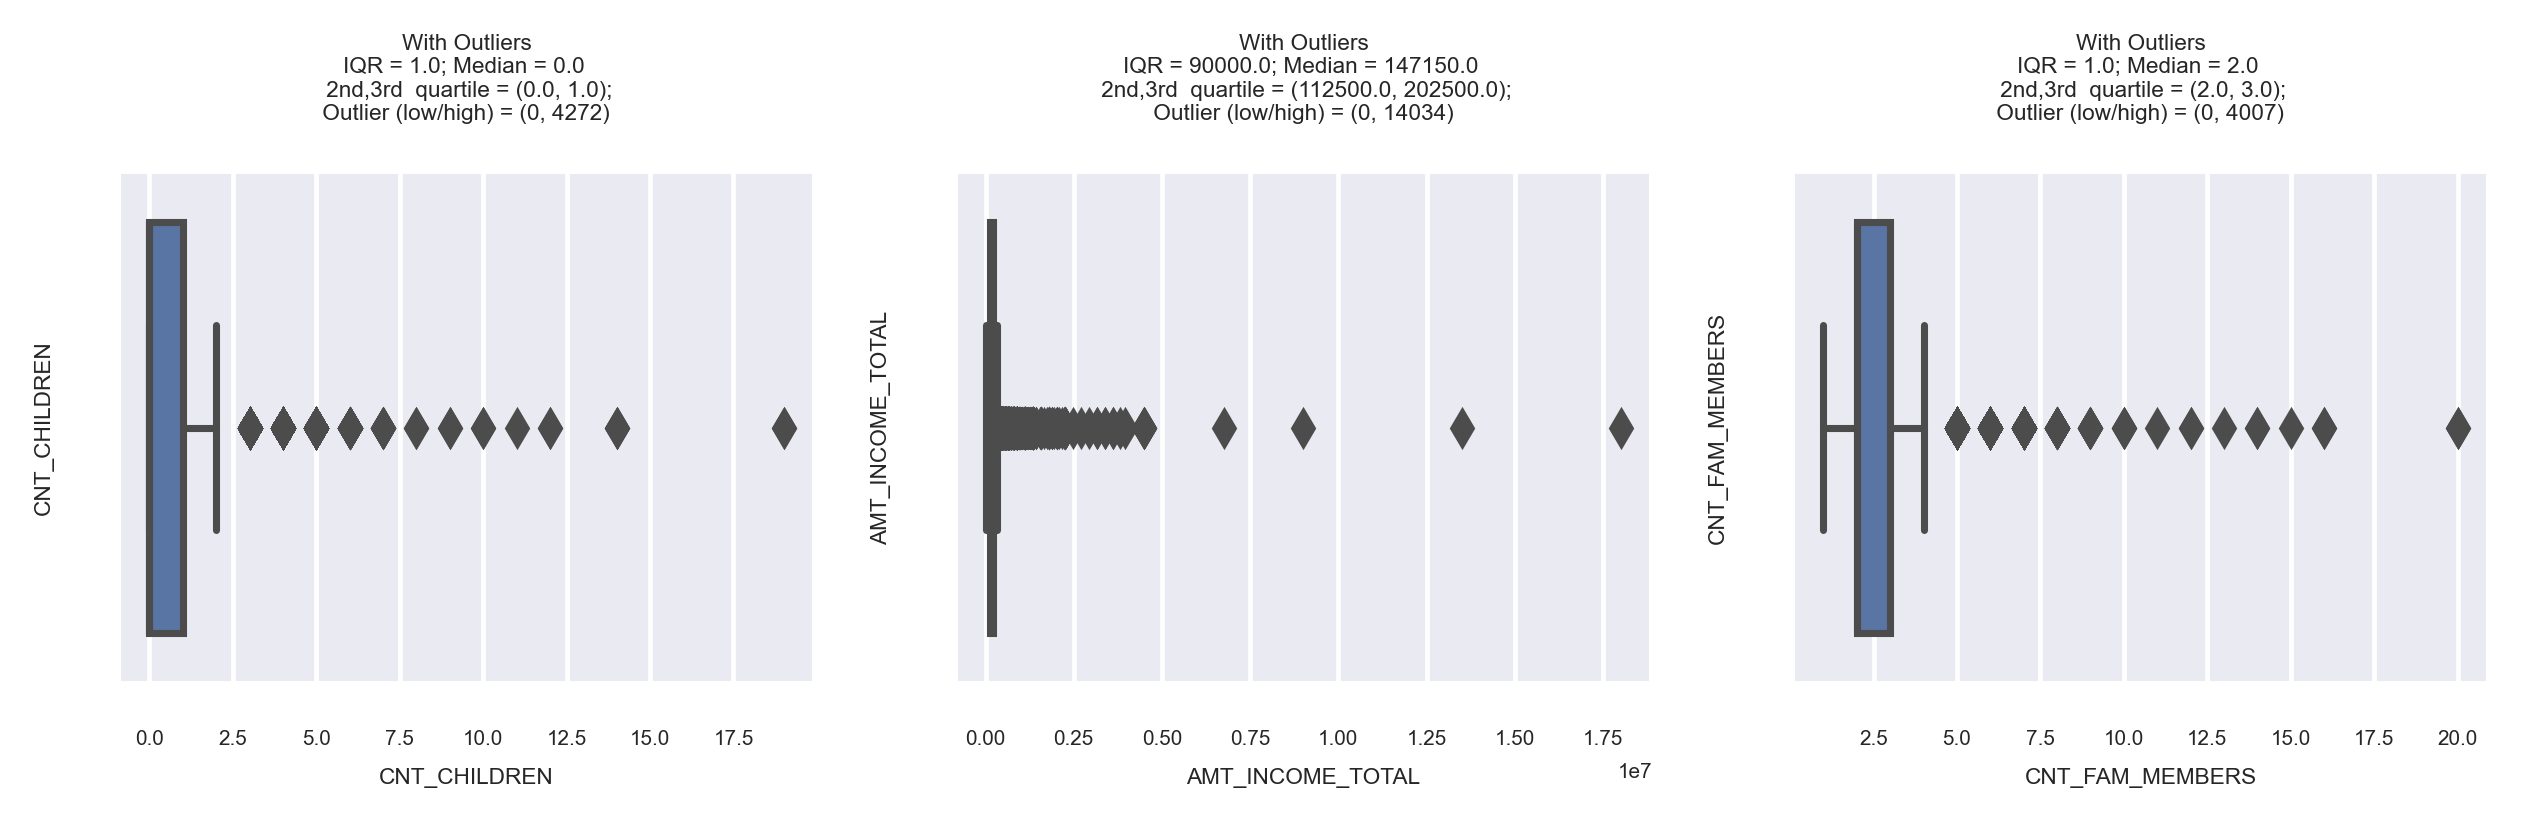

In [57]:
UVA_outlier(app_data, ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS'], include_outlier = True)

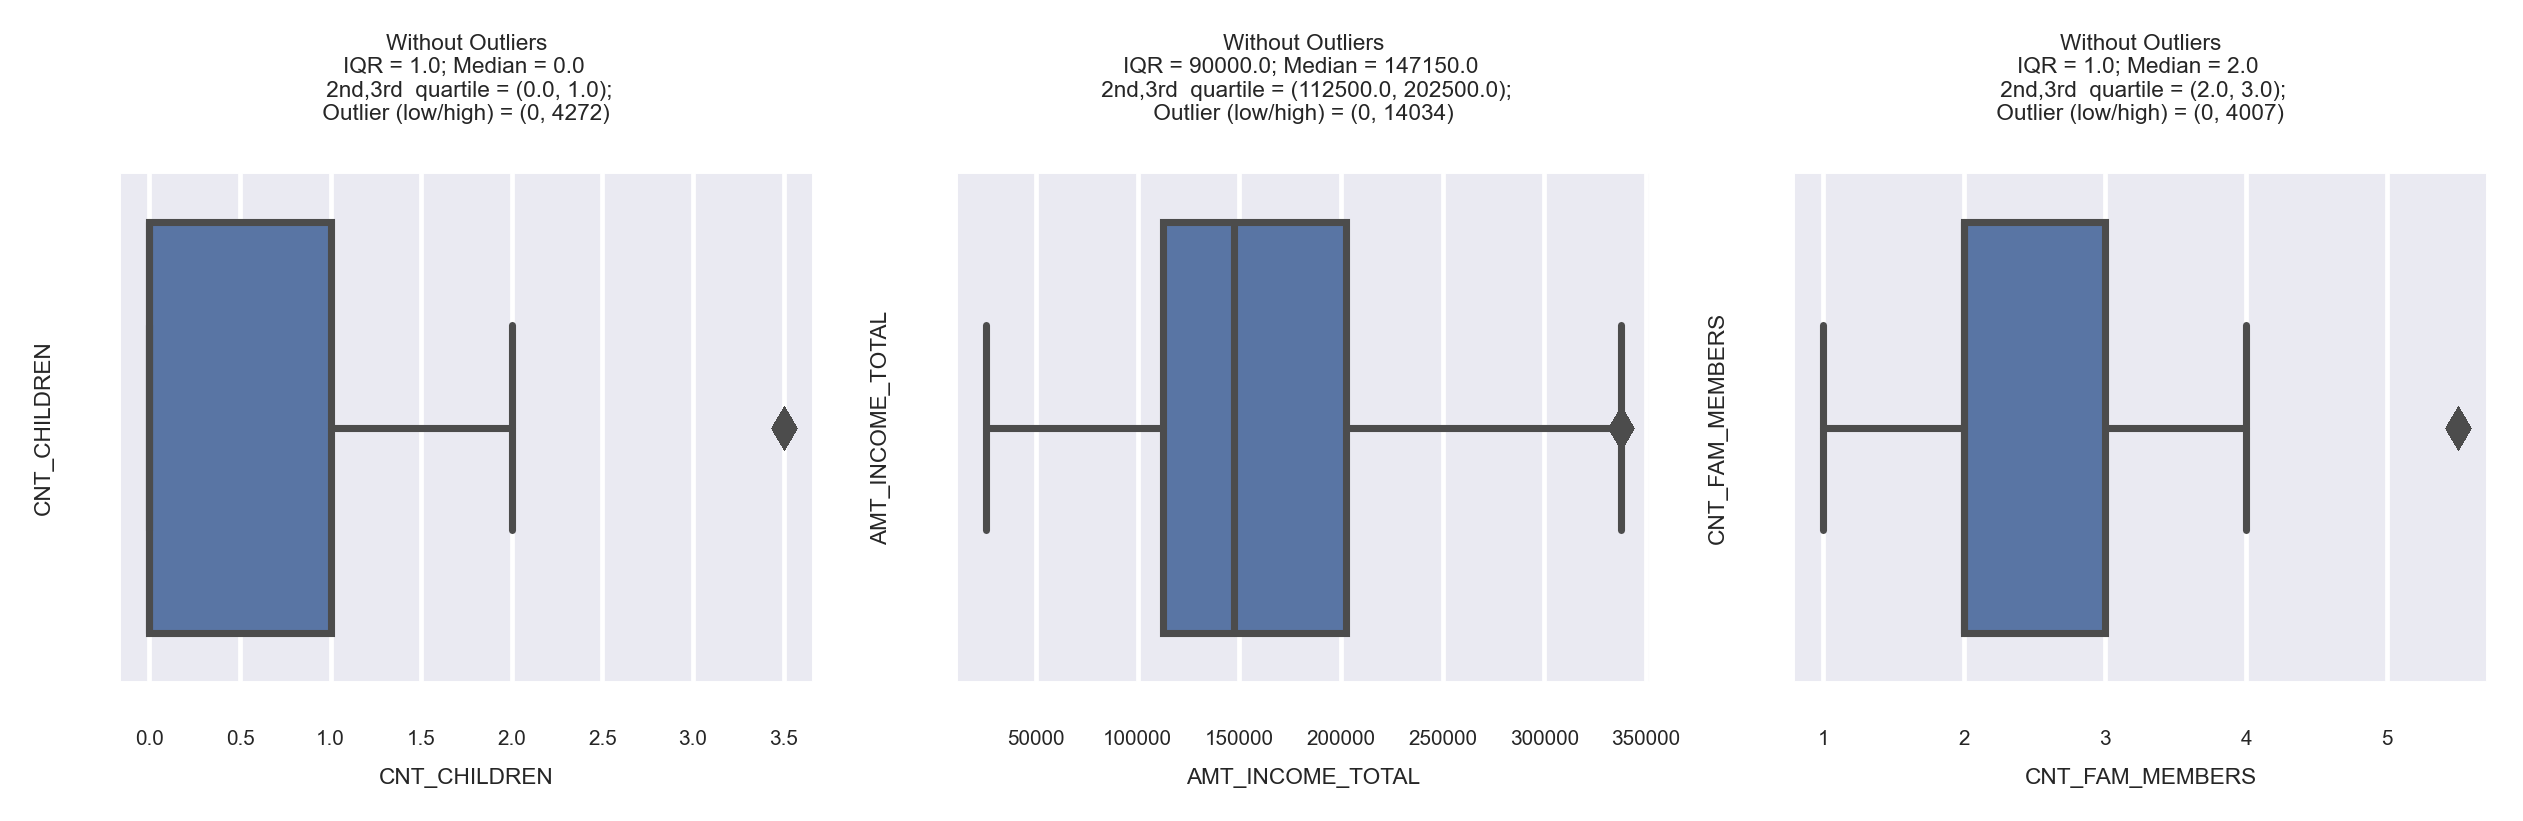

In [59]:
UVA_outlier(app_data, ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS'], include_outlier = False)

In [60]:
app_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_class,DAYS_BIRTH_YEAR,DAYS_ID_PUBLISH_YEAR,DAYS_EMPLOYED_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0.0,YES,NO,YES,YES,NO,Laborers,1.0,2,2,WEDNESDAY,10,Same,Same,Same,0,Same,Same,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,Default,26,6,2
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,0.0,YES,NO,YES,YES,NO,Core staff,2.0,1,1,MONDAY,11,Same,Same,Same,0,Same,Same,School,0.0,0.0,0.0,0.0,0.0,0.0,Not default,46,1,3
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,YES,YES,YES,YES,NO,Laborers,1.0,2,2,MONDAY,9,Same,Same,Same,0,Same,Same,Government,0.0,0.0,0.0,0.0,0.0,0.0,Not default,52,7,1
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,0.0,YES,NO,YES,NO,NO,Laborers,2.0,2,2,WEDNESDAY,17,Same,Same,Same,0,Same,Same,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,Not default,52,7,8
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,0.0,YES,NO,YES,NO,NO,Core staff,1.0,2,2,THURSDAY,11,Same,Same,Same,0,Different,Different,Religion,0.0,0.0,0.0,0.0,0.0,0.0,Not default,55,9,8


From the summary of all the columns of the data, we can see that only some columns can be included in Outlier removal, for example, 'TARGET' column (numerical) cannot be included in Outlier removal, as the values are only 0 and 1, and maximum values are 0, which means that Outlier removal will make the 1's value omitted, that is what we do not want.

So, we would include only some numerical columns in our Outlier Removal function, defined below.

In [61]:
## From the function defined above (UVA_Outlier), we take the part where the Outliers get removed

## And define another function

def outlier_remove(data, col_group, threshold = 1.5):
    for i in col_group:

        q1= data[i].quantile(0.25)
        q3= data[i].quantile(0.75)
        IQR = q3 - q1
        whis_low = q1-(threshold*IQR)
        whis_high = q3+(threshold*IQR)
        data[i][data[i]>whis_high] = whis_high
        data[i][data[i]<whis_low] = whis_low


In [62]:
out_num = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS'] # Columns from which Outliers need to be removed

In [63]:
outlier_remove(app_data, out_num)

It can be clearly seen that our data has not been effected much, i.e., in terms of Central Tendencies, after the Outlier removal. Thus, we would be using the above data for our Model Building.

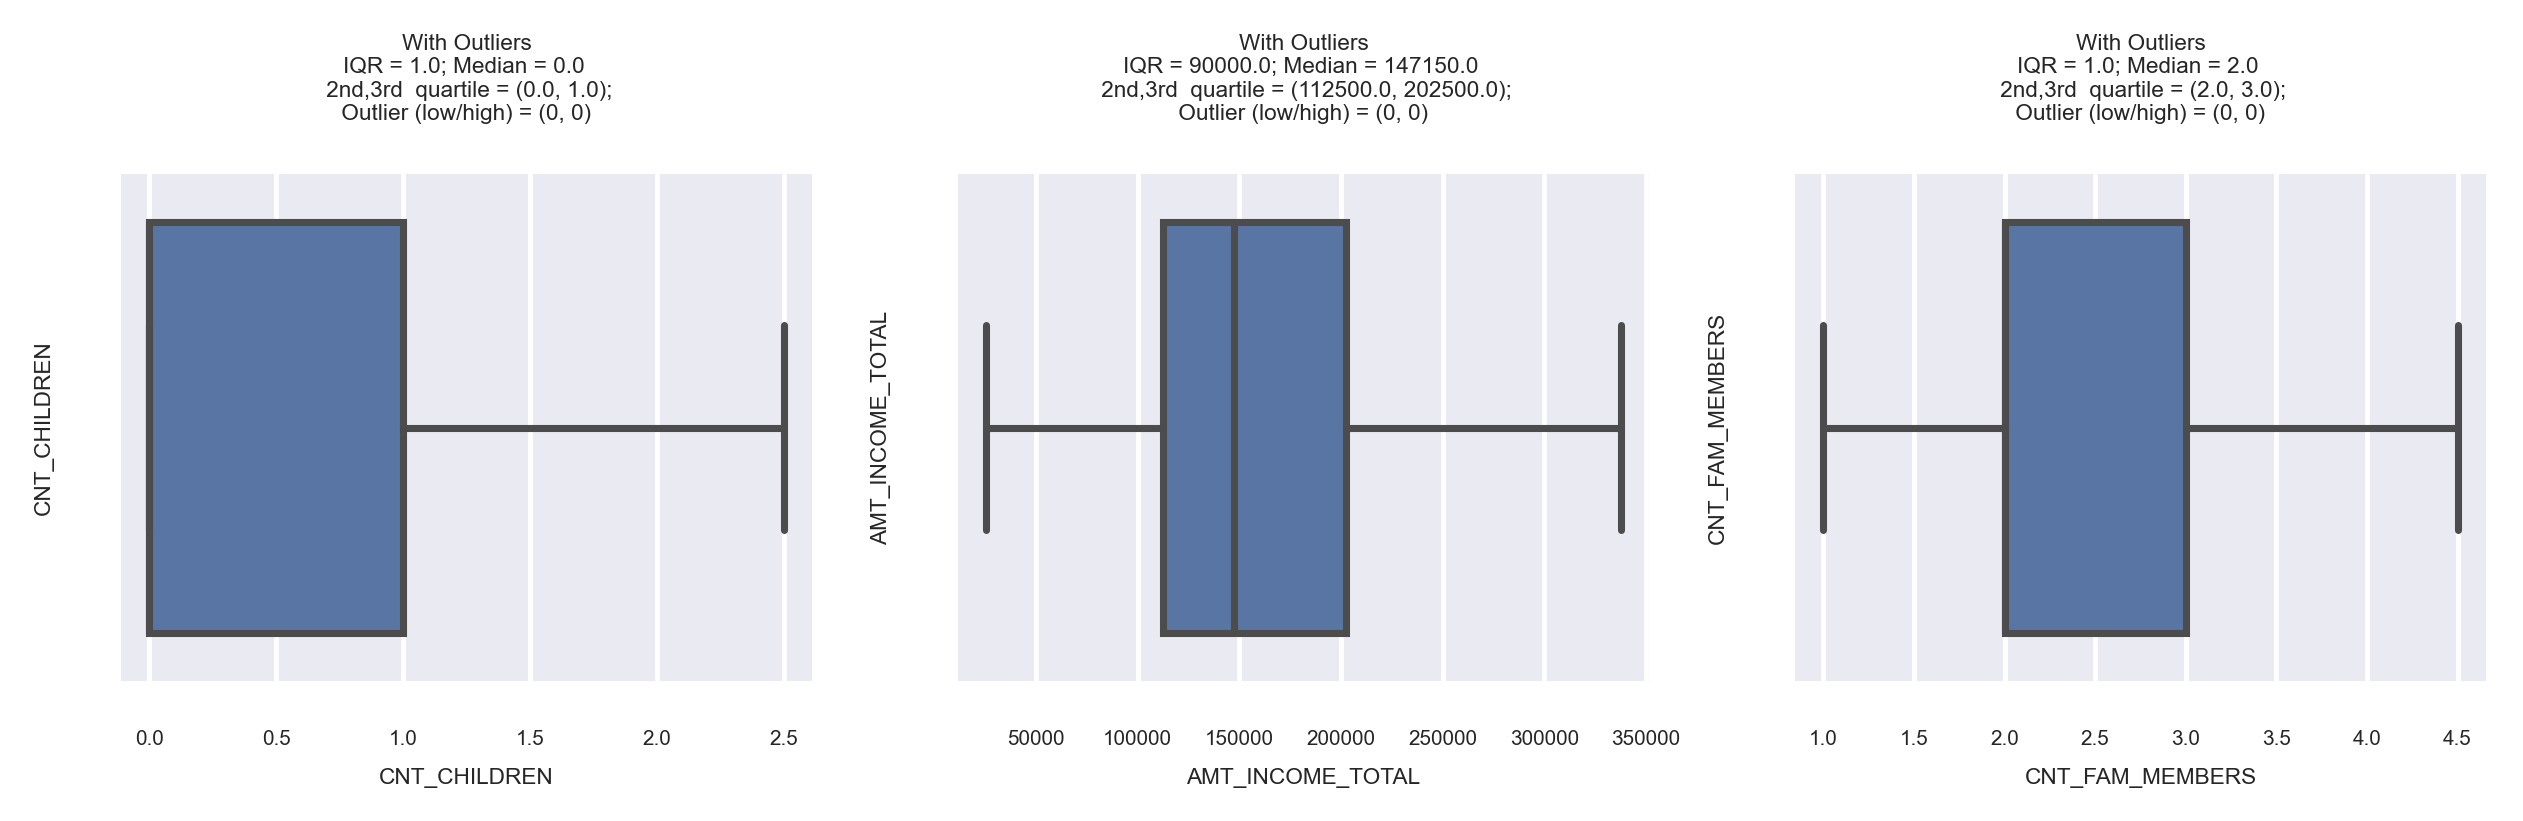

In [64]:
UVA_outlier(app_data, ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS'], include_outlier = True)

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Grouping Categorical Variables</span>  </h1> 

In [64]:
print(cat_cols)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'TARGET_class']


Out of all the above categorical columns, we need to find the columns which have too many unique categories and categorise them using some other schema.

In [65]:
group_cols = []

for i in cat_cols:
    if len(app_data[i].unique()) >= 5:  # Find all the columns where the unique maps are more than 5
        group_cols.append(i)
        
    else:
        pass
    
    
group_cols

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

Now, we need to group all these respective columns, to improve our model performance later.

In [66]:
app_data['NAME_TYPE_SUITE'].value_counts()


Unaccompanied      249588
Family             40312 
Spouse, partner    11407 
Children           3284  
Other_B            1778  
Other_A            870   
Group of people    272   
Name: NAME_TYPE_SUITE, dtype: int64

All children will belong to some family as there is a higher chance of families making the accounts of their respective children in the same bank to get more benifits. 

All the individuals except "Unaccompanied" (since they are large in numbers), "Family" , "Spouse, partner" are going to belong in the same group, i.e., "Group of People" because of their lower numbers as well as uncertainity when compared to the earlier four groups.

So, we will be maping them as per this logic.

In [67]:
app_data['NAME_TYPE_SUITE_G'] = app_data['NAME_TYPE_SUITE'].map({'Children':'Children-Family','Family':'Children-Family',
                                                    'Spouse, partner':'Spouse-Unaccompanied',
                                                    'Unaccompanied':'Spouse-Unaccompanied',
                                                    'Group of people':'Group_of_people-Other_A-Other_B','Other_A':'Group_of_people-Other_A-Other_B','Other_B':'Group_of_people-Other_A-Other_B'})
app_data['NAME_TYPE_SUITE_G'].unique()

array(['Spouse-Unaccompanied', 'Children-Family',
       'Group_of_people-Other_A-Other_B'], dtype=object)

In [68]:
app_data['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate    71617 
Pensioner               55362 
State servant           21703 
Unemployed              22    
Student                 18    
Businessman             10    
Maternity leave         5     
Name: NAME_INCOME_TYPE, dtype: int64

In the column 'NAME_INCOME_TYPE', it can be seen that 'Working', 'Commercial Associate', 'State Servant' and 'Businessman' overall belong to the same class because of thier working (employed) nature. 'Pensioner' belong to a different mapping because they have already worked and are receiving pension (not unemployed). 

While 'Unemployed', 'Student' (mostly are unemployed) and 'Maternity Leave' due to their small number are in the same category of 'Unemployed'.

So, mapping the values as per the above logic.


In [69]:
app_data['NAME_INCOME_TYPE_G'] = app_data['NAME_INCOME_TYPE'].map({'Working':'Working', 'Commercial associate': 'Working', 'Pensioner' : 'Pensioner', 'State servant': 'Working', 'Unemployed': 'Unemployed',
                                                                   'Student': 'Unemployed', 'Maternity leave' :'Unemployed', 'Businessman':'Working'})
app_data['NAME_INCOME_TYPE_G'].unique()

array(['Working', 'Pensioner', 'Unemployed'], dtype=object)

In [70]:
app_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                 74863 
Incomplete higher                10277 
Lower secondary                  3816  
Academic degree                  164   
Name: NAME_EDUCATION_TYPE, dtype: int64

'Secondary / secondary special' and 'Incomplete higher' belong to the same category of 'Secondary', while rest of the categories remain same as per their original mapping.

In [71]:
app_data['NAME_EDUCATION_TYPE_G'] = app_data['NAME_EDUCATION_TYPE'].map({'Secondary / secondary special':'Secondary','Higher education':'Higher education','Incomplete higher':'Secondary','Lower secondary':'Lower secondary','Academic degree':'Academic degree'})

app_data['NAME_EDUCATION_TYPE_G'].unique()

array(['Secondary', 'Higher education', 'Lower secondary',
       'Academic degree'], dtype=object)

In [72]:
app_data['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married    45444 
Civil marriage          29775 
Separated               19770 
Widow                   16088 
Unknown                 2     
Name: NAME_FAMILY_STATUS, dtype: int64

Putting 'Married' and 'Civil marriage' in the same bucket of 'Married' as Civil marriage also accounts to being married (with a certain legality). Rest of the categories remain same except 'Unknown' which is by default expected to be 'Not Married'.

In [73]:
app_data['NAME_FAMILY_STATUS_G'] = app_data['NAME_FAMILY_STATUS'].map({'Single / not married':'Not Married',
                                                             'Married':'Married/separated','Civil marriage':'Married/separated',
                                                             'Widow':'Widow/separated','Separated': 'Widow/separated', 'Unknown': 'Not Married' })

app_data['NAME_FAMILY_STATUS_G'].unique()

array(['Not Married', 'Married/separated', 'Widow/separated'],
      dtype=object)

In [74]:
app_data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents           14840 
Municipal apartment    11183 
Rented apartment       4881  
Office apartment       2617  
Co-op apartment        1122  
Name: NAME_HOUSING_TYPE, dtype: int64

Putting 'House / apartment', 'Municipal apartment' and 'House / apartment' under the same hood.

In [75]:
app_data['NAME_HOUSING_TYPE_G'] = app_data['NAME_HOUSING_TYPE'].map({'Rented apartment':'Rental_apartment/With_parents','With parents':'Rental_apartment/With_parents', 'Office apartment':'Office apartment' })
app_data['NAME_HOUSING_TYPE_G'].fillna('Co/Muncipal/Apartment',inplace=True)
app_data['NAME_HOUSING_TYPE_G'].unique()

array(['Co/Muncipal/Apartment', 'Rental_apartment/With_parents',
       'Office apartment'], dtype=object)

In [76]:
app_data['OCCUPATION_TYPE'].value_counts()

Laborers                 80474
Sales staff              46759
Core staff               40313
Managers                 31053
Drivers                  27168
High skill tech staff    16508
Accountants              14358
Medicine staff           12313
Security staff           9751 
Cooking staff            8605 
Cleaning staff           6764 
Private service staff    3892 
Low-skill Laborers       3015 
Waiters/barmen staff     1977 
Secretaries              1900 
Realty agents            1071 
HR staff                 809  
IT staff                 781  
Name: OCCUPATION_TYPE, dtype: int64

Putting Waiters/barmen staff, Secretaries, Realty agents, HR staff, IT staff etc in 'High staff' as they have more executive responsibilities. 

Security Staff, Laborers etc belong to the 'Medium Staff' and others belong to the 'Low-skill Laborers' who handle the execution of the task as per the guidelines of the above two staffs.

In [77]:
app_data['OCCUPATION_TYPE_G'] = app_data['OCCUPATION_TYPE'].map({'HR staff':'High staff','High skill tech staff':'High staff',
                                                         'Managers':'High staff','Core staff':'High staff','IT staff':'High staff','Others':'Low-skill Laborers',
                                                         'Private service staff':'High staff','Medicine staff':'High staff',
                                                         'Secretaries':'High staff','Realty agents':'High staff',
                                                         'Cleaning staff':'Medium staff','Sales staff':'Medium staff', 
                                                         'Cooking staff':'Medium staff', 'Laborers':'Medium staff', 
                                                         'Security staff':'Medium staff','Waiters/barmen staff':'Medium staff',
                                                         'Drivers':'Medium staff','Accountants':'Accountants',
                                                         'Low-skill Laborers':'Low-skill Laborers'})

app_data['OCCUPATION_TYPE_G'].unique()

array(['Medium staff', 'High staff', 'Accountants', 'Low-skill Laborers'],
      dtype=object)

In [78]:
app_data['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

Putting 'SATURDAY' and 'SUNDAY' in the 'WEEKEND' mapping because on these das the number of appliaction are fairly low when compared to the rest of the weekdays. 

Putting all the rest of weekdays in their respective names because of the number of applications are uniform among them.

In [79]:
app_data['WEEKDAY_APPR_PROCESS_START_G'] = app_data['WEEKDAY_APPR_PROCESS_START'].map({'MONDAY':'MONDAY','TUESDAY':'TUESDAY', 'WEDNESDAY':'WEDNESDAY',
                                                                                      'THURSDAY':'THURSDAY', 'FRIDAY':'FRIDAY', 'SATURDAY' : 'WEEKEND',
                                                                                      'SUNDAY':'WEEKEND'})
app_data['WEEKDAY_APPR_PROCESS_START_G'].unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'WEEKEND', 'FRIDAY', 'TUESDAY'],
      dtype=object)

In [80]:
app_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    82901
Self-employed             46869
Other                     20281
Medicine                  13708
Business Entity Type 2    12983
Government                12665
School                    10877
Trade: type 7             9520 
Kindergarten              8387 
Construction              8222 
Business Entity Type 1    7377 
Transport: type 4         6625 
Trade: type 3             4203 
Industry: type 9          4047 
Security                  3979 
Industry: type 3          3920 
Housing                   3619 
Industry: type 11         3306 
Military                  3217 
Bank                      3040 
Agriculture               2983 
Police                    2858 
Transport: type 2         2687 
Postal                    2600 
Security Ministries       2422 
Trade: type 2             2326 
Restaurant                2202 
Services                  1910 
University                1621 
Industry: type 7          1564 
Transport: type 3         1437 
Industry

Putting all the variables as per their type and dividing them into seven different types.

In [81]:
app_data['ORGANIZATION_TYPE_G'] = app_data['ORGANIZATION_TYPE'].map({'Transport: type 3':'Type1', 'Industry: type 13':'Type2', 'Industry: type 8':'Type2',
       'Construction':'Type3', 'Restaurant':'Type3', 'Cleaning':'Type3', 'Industry: type 1':'Type3', 'Realtor':'Type3',
       'Industry: type 3':'Type3', 'Agriculture':'Type3', 'Trade: type 3':'Type3', 'Self-employed':'Type3',
       'Industry: type 4':'Type3', 'Security':'Type4', 'Trade: type 7':'Type4', 'Transport: type 4':'Type4',
       'Business Entity Type 3':'Type4', 'Mobile':'Type4', 'Trade: type 1':'Type4',
       'Industry: type 11':'Type4', 'Business Entity Type 2':'Type4', 'Postal':'Type4', 'Advertising':'Type4',
       'Business Entity Type 1':'Type4', 'Industry: type 7':'Type4', 'Housing':'Type5',
       'Legal Services':'Type5', 'Transport: type 2':'Type5', 'Telecom':'Type5', 'Other':'Type5',
       'Industry: type 2':'Type5', 'Industry: type 6':'Type5', 'Kindergarten':'Type5', 'Government':'Type5',
       'Trade: type 2':'Type5', 'Industry: type 5':'Type5', 'Emergency':'Type5', 'Industry: type 9':'Type5',
       'Electricity':'Type5', 'Medicine':'Type5', 'Services':'Type5', 'Hotel':'Type5', 'Industry: type 10':'Type5',
       'Trade: type 5':'Type5', 'School':'Type6', 'Religion':'Type6', 'Insurance':'Type6', 'Culture':'Type6', 'XNA':'Type6',
       'Bank':'Type6', 'Military':'Type6', 'Police':'Type6', 'University':'Type6', 'Security Ministries':'Type6',
       'Transport: type 1':'Type6', 'Trade: type 6':'Type6', 'Industry: type 12':'Type7',
       'Trade: type 4':'Type7'})

app_data['ORGANIZATION_TYPE_G'].value_counts()

Type4    132204
Type5    75336 
Type3    71533 
Type6    26335 
Type1    1437  
Type7    549   
Type2    117   
Name: ORGANIZATION_TYPE_G, dtype: int64

In [82]:
# deleting the columns from which the above have been derived

for i in group_cols:
    del(app_data[i])


<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">One-Hot Encoding</span>  </h1>

In [83]:
app_data.dtypes

del(app_data['TARGET_class'])

In [84]:
## Selecting all the columns with 'object' datatype as they are our Categorical Columns

one_hot = app_data.select_dtypes('object')

one_hot = one_hot.columns.tolist()

one_hot

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_TYPE_SUITE_G',
 'NAME_INCOME_TYPE_G',
 'NAME_EDUCATION_TYPE_G',
 'NAME_FAMILY_STATUS_G',
 'NAME_HOUSING_TYPE_G',
 'OCCUPATION_TYPE_G',
 'WEEKDAY_APPR_PROCESS_START_G',
 'ORGANIZATION_TYPE_G']

In [85]:
app_data = pd.get_dummies(app_data, columns = one_hot, drop_first = True)   ## drop_first is done

## to avoid multiple columns dipicting same information, ex: we don't need different one-hot encoded
## columns for male and female gender

In [86]:
app_data.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEAR,DAYS_ID_PUBLISH_YEAR,DAYS_EMPLOYED_YEAR,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,FLAG_EMP_PHONE_YES,FLAG_WORK_PHONE_YES,FLAG_CONT_MOBILE_YES,FLAG_PHONE_YES,FLAG_EMAIL_YES,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,REG_REGION_NOT_LIVE_REGION_Same,REG_REGION_NOT_WORK_REGION_Same,LIVE_REGION_NOT_WORK_REGION_Same,REG_CITY_NOT_WORK_CITY_Same,LIVE_CITY_NOT_WORK_CITY_Same,NAME_TYPE_SUITE_G_Group_of_people-Other_A-Other_B,NAME_TYPE_SUITE_G_Spouse-Unaccompanied,NAME_INCOME_TYPE_G_Unemployed,NAME_INCOME_TYPE_G_Working,NAME_EDUCATION_TYPE_G_Higher education,NAME_EDUCATION_TYPE_G_Lower secondary,NAME_EDUCATION_TYPE_G_Secondary,NAME_FAMILY_STATUS_G_Not Married,NAME_FAMILY_STATUS_G_Widow/separated,NAME_HOUSING_TYPE_G_Office apartment,NAME_HOUSING_TYPE_G_Rental_apartment/With_parents,OCCUPATION_TYPE_G_High staff,OCCUPATION_TYPE_G_Low-skill Laborers,OCCUPATION_TYPE_G_Medium staff,WEEKDAY_APPR_PROCESS_START_G_MONDAY,WEEKDAY_APPR_PROCESS_START_G_THURSDAY,WEEKDAY_APPR_PROCESS_START_G_TUESDAY,WEEKDAY_APPR_PROCESS_START_G_WEDNESDAY,WEEKDAY_APPR_PROCESS_START_G_WEEKEND,ORGANIZATION_TYPE_G_Type2,ORGANIZATION_TYPE_G_Type3,ORGANIZATION_TYPE_G_Type4,ORGANIZATION_TYPE_G_Type5,ORGANIZATION_TYPE_G_Type6,ORGANIZATION_TYPE_G_Type7
0,1,0,202500.0,406597.5,24700.5,0.018801,0.0,1.0,10,0,0.0,0.0,0.0,0.0,0.0,1.0,26,6,2,0,1,0,1,1,0,1,1,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,0,0,270000.0,1293502.5,35698.5,0.003541,0.0,2.0,11,0,0.0,0.0,0.0,0.0,0.0,0.0,46,1,3,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,67500.0,135000.0,6750.0,0.010032,26.0,1.0,9,0,0.0,0.0,0.0,0.0,0.0,0.0,52,7,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
3,0,0,135000.0,312682.5,29686.5,0.008019,0.0,2.0,17,0,0.0,0.0,0.0,0.0,0.0,0.0,52,7,8,0,0,0,1,1,0,1,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,0,0,121500.0,513000.0,21865.5,0.028663,0.0,1.0,11,0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,8,0,1,0,1,1,0,1,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [87]:
for i in app_data.columns:
    print(i)

TARGET
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
REGION_POPULATION_RELATIVE
OWN_CAR_AGE
CNT_FAM_MEMBERS
HOUR_APPR_PROCESS_START
REG_CITY_NOT_LIVE_CITY
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
DAYS_BIRTH_YEAR
DAYS_ID_PUBLISH_YEAR
DAYS_EMPLOYED_YEAR
NAME_CONTRACT_TYPE_Revolving loans
CODE_GENDER_M
FLAG_OWN_CAR_Y
FLAG_OWN_REALTY_Y
FLAG_EMP_PHONE_YES
FLAG_WORK_PHONE_YES
FLAG_CONT_MOBILE_YES
FLAG_PHONE_YES
FLAG_EMAIL_YES
REGION_RATING_CLIENT_2
REGION_RATING_CLIENT_3
REGION_RATING_CLIENT_W_CITY_2
REGION_RATING_CLIENT_W_CITY_3
REG_REGION_NOT_LIVE_REGION_Same
REG_REGION_NOT_WORK_REGION_Same
LIVE_REGION_NOT_WORK_REGION_Same
REG_CITY_NOT_WORK_CITY_Same
LIVE_CITY_NOT_WORK_CITY_Same
NAME_TYPE_SUITE_G_Group_of_people-Other_A-Other_B
NAME_TYPE_SUITE_G_Spouse-Unaccompanied
NAME_INCOME_TYPE_G_Unemployed
NAME_INCOME_TYPE_G_Working
NAME_EDUCATION_TYPE_G_Higher education
NAME_E

In [88]:
# app_data.to_csv('final_data.csv')